### Question 1

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
diabetes = datasets.load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data["target"] = diabetes.target
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


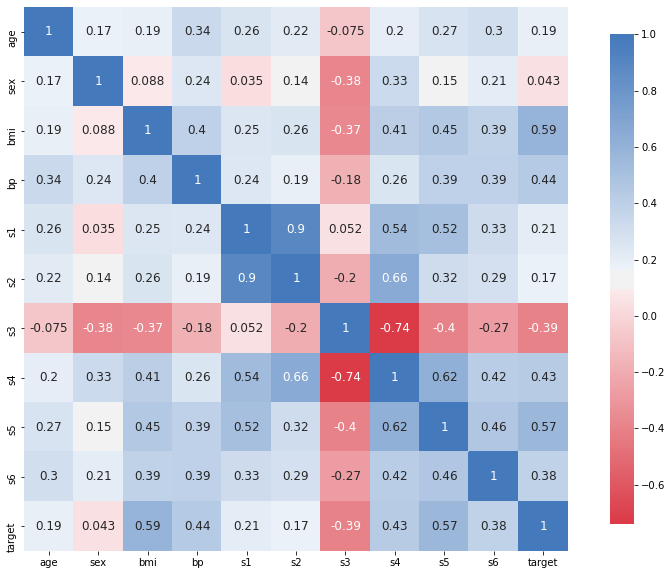

In [3]:
s , ax = plt.subplots(figsize =( 15 , 10))
cmap = sns.diverging_palette(10 , 250 , as_cmap = True )
s = sns.heatmap(data.corr(), cmap = cmap, square=True,ax=ax, annot = True,cbar_kws={'shrink' : .9 }, annot_kws = {'fontsize':12})

In [4]:
from sklearn.decomposition import PCA

In [5]:
diabetesPCA = PCA(n_components=2).fit_transform(diabetes.data)
diabetesPCA = pd.DataFrame(diabetesPCA, columns=["var 1", "var 2"])
diabetesPCA["targets"] = diabetes.target
diabetesPCA

,var 1,var 2,targets
0,0.027931,-0.092601,151.0
1,-0.134686,0.065263,75.0
2,0.012945,-0.077764,141.0
3,0.002345,0.018182,206.0
4,-0.035981,0.038621,135.0
...,...,...,...
437,0.058958,-0.049275,178.0
438,0.060155,0.036211,104.0
439,-0.009763,-0.057337,132.0
440,0.032956,0.009994,220.0


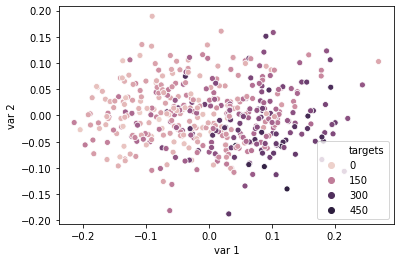

In [30]:
sns.scatterplot(data=diabetesPCA, x="var 1", y="var 2", hue="targets")

### Question 2

In [31]:
from sklearn import linear_model# pip install scikit-learn==0.23.2
from sklearn.model_selection import train_test_split
import numpy as np
X = np.array(data)[:,np.newaxis,2]
y = np.array(data)[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [32]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
accuracy = model.score(X_test,y_test)
y_predict = model.predict(X_test)
print("Score: ",accuracy)
y_predict

Score:  0.23335039815872138


array([145.80622687, 188.85739048, 147.95878505, 203.92529774,
       131.8145987 , 127.50948234, 322.31599764, 197.4676232 ,
        61.85645785, 167.33180868, 118.89924962,  94.14483055,
        90.91599328, 166.25552959,  96.29738873, 157.64529687,
       223.29832136, 240.5187868 , 180.24715776, 210.38297228,
       191.00994866, 109.21273781, 102.75506327, 174.86576231,
       196.39134411, 166.25552959, 211.45925137, 133.96715688,
        78.0006442 , 130.73831961, 244.82390316, 114.59413326,
       166.25552959, 145.80622687, 192.08622775, 229.7559959 ,
       121.0518078 , 118.89924962, 121.0518078 ,  94.14483055,
        82.30576056, 122.12808689, 129.66204052, 118.89924962,
       107.06017963, 116.74669144, 115.67041235, 101.67878418,
        67.2378533 , 153.34018051, 210.38297228,  82.30576056,
       169.48436686, 111.36529599, 133.96715688, 216.84064682,
       105.98390054, 213.61180955, 133.96715688,  97.37366782,
       182.39971594, 193.16250684, 206.07785592, 107.06

### Question 4

In [33]:
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_predict)
print("The mean squared error is: ", msle)

The mean squared error is:  0.22131615927599504


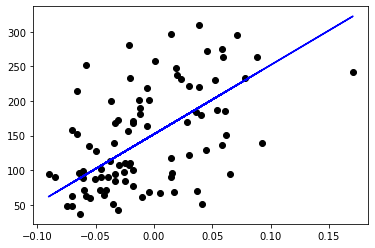

In [34]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='blue')

### Question 5

In [111]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
accuracy = model.score(X_test,y_test)
print(accuracy)

0.47257544798227136
